# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv('E:/DA_Yandex/real_estate_data.csv',sep = '\t')
pd.options.display.float_format = '{:,.2f}'.format
pd.options.display.max_columns = 100
data.describe()

display(data.head(10))
data.info()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,NaN,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,NaN,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,NaN,14.00,NaN,9,NaN,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,NaN,12.00,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,NaN,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,NaN,24.00,NaN,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,NaN,27.00,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data['days_exposition'].describe()

count   20,518.00
mean       180.89
std        219.73
min          1.00
25%         45.00
50%         95.00
75%        232.00
max      1,580.00
Name: days_exposition, dtype: float64

In [4]:
data['total_area'].describe()

count   23,699.00
mean        60.35
std         35.65
min         12.00
25%         40.00
50%         52.00
75%         69.90
max        900.00
Name: total_area, dtype: float64

In [5]:
data.info()
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
data['last_price'] = data['last_price'].astype(int)
data.isna().sum()
data = data.dropna(subset=['floors_total'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

- ***Поле last_price' перевели в int цена примняется округленно, как правило до тысяч рублей***

- ***Провели удаление пропущенных значений в столбце total_floor, далее меняем его тип на int***

In [6]:
data.isna().sum()
data['floors_total'] = data['floors_total'].astype(int)

 - ***Много пропущенных данных в полях ceiling_height,living_area и kitchen_area заменим пропуски в living_area и kitchen_area с использованием коэффициента приведения от общей площади, для  пропущенных данных в ceiling_height используем медианное значение.***

In [7]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23613 non-null  int64         
 1   last_price            23613 non-null  int32         
 2   total_area            23613 non-null  float64       
 3   first_day_exposition  23613 non-null  datetime64[ns]
 4   rooms                 23613 non-null  int64         
 5   ceiling_height        14495 non-null  float64       
 6   floors_total          23613 non-null  int32         
 7   living_area           21743 non-null  float64       
 8   floor                 23613 non-null  int64         
 9   is_apartment          2775 non-null   object        
 10  studio                23613 non-null  bool          
 11  open_plan             23613 non-null  bool          
 12  kitchen_area          21382 non-null  float64       
 13  balcony         

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment            20838
studio                      0
open_plan                   0
kitchen_area             2231
balcony                 11480
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000         5508
parks_nearest           15568
ponds_around3000         5508
ponds_nearest           14552
days_exposition          3172
dtype: int64

In [8]:
print ('Площадь кухни средняя: ', data['kitchen_area'].mean())
print ('Площадь кухни медиана: ', data['kitchen_area'].median())
print ('Средняя высота потолка в квартире:', data['ceiling_height'].mean())
print ('Медиана высоты потолка в квартире:', data['ceiling_height'].median())


Площадь кухни средняя:  10.56412777102239
Площадь кухни медиана:  9.1
Средняя высота потолка в квартире: 2.771494998275211
Медиана высоты потолка в квартире: 2.65


- ***Наблюдается незначительная разница в высоте потолка в среднем и по медиане, поэтому можно заменить значения высоты потолка нф медианау по всему фрейму. Медиана площади кухни 9,1 средняя площадь 10,5***

In [9]:
data['is_apartment'].unique()
data['is_apartment'] = data['is_apartment'].fillna(value=False)
data['is_apartment'].unique()

array([False,  True])

- ***Вносим изменения в название населенных пуктов и устраняем неявные дубликаты, перезаписываем солбец locality_name***

In [10]:
print (data['locality_name'].unique(), sep = '\t')

['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'деревня Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Све

In [11]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

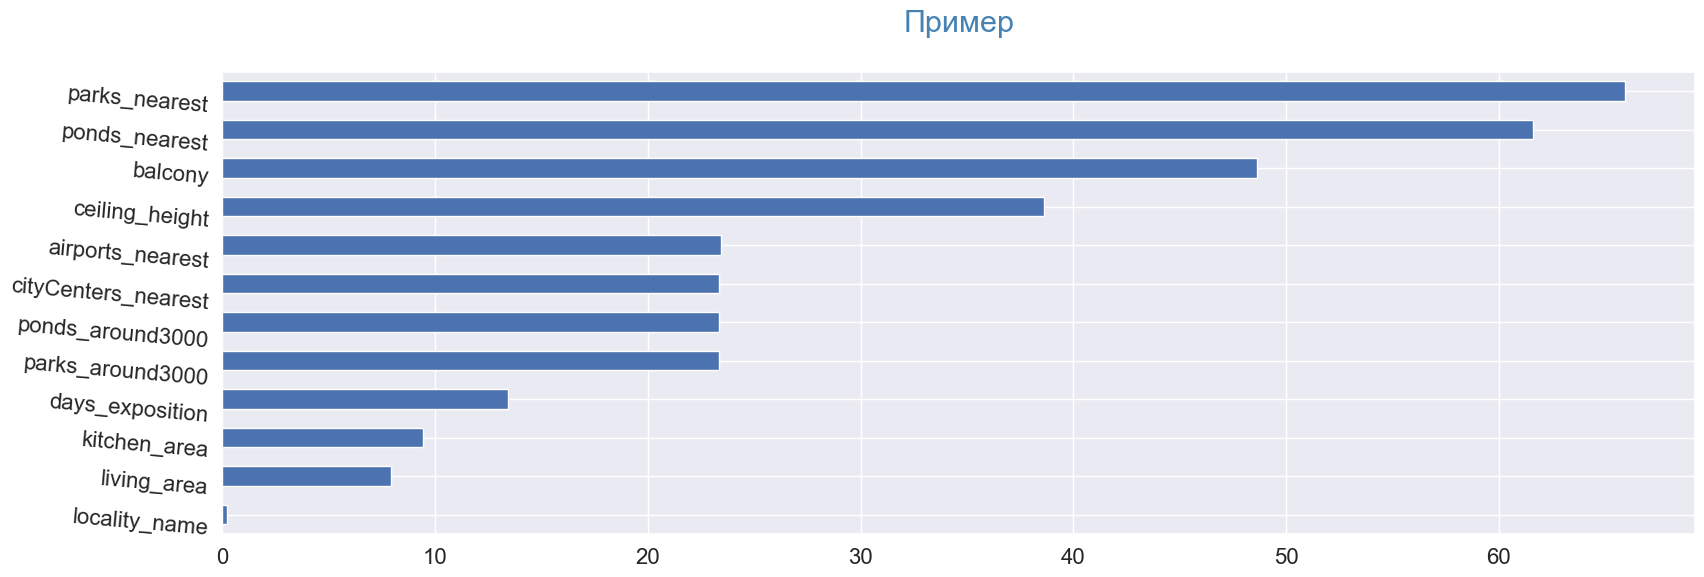

In [12]:
pass_value_barh(data)

In [13]:
data['locality_name'] = data['locality_name'].replace({'поселок':'посёлок', 'Никольское': 'село Никольское', 'городской посёлок Советский': 'посёлок городского типа Советский',
                                                      'городской посёлок Большая Ижора': 'посёлок городского типа Большая Ижора', 'городской посёлок Лесогорский': 'посёлок городского типа Лесогорский',
                                                      'посёлок Рябово': 'посёлок городского типа Рябово', 'городской посёлок Мга': 'посёлок городского типа Мга', 
                                                      'городской посёлок Павлово': 'посёлок городского типа Павлово', 'городской посёлок Назия': 'посёлок городского типа Назия',
                                                      'коттеджный посёлок Лесное': 'посёлок Лесное', 'Мурино': 'посёлок Мурино', 'Любань': 'посёлок Любань', 'городской посёлок Рощино': 'посёлок городского типа Рощино',
                                                      'деревня Кудрово': 'Кудрово'})
data.dropna(subset=['locality_name'])
data = data.drop_duplicates().reset_index(drop=True)
display(data.head(10))
print (data['locality_name'].unique(), sep = '\t')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,False,False,False,25.00,NaN,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,NaN
1,7,3350000,40.40,2018-12-04,1,NaN,11,18.60,1,False,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,NaN,0.00,NaN,81.00
2,10,5196000,56.00,2015-08-20,2,NaN,5,34.30,4,False,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,64900000,159.00,2015-07-24,3,NaN,14,NaN,9,False,False,False,NaN,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,False,False,False,41.00,NaN,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,2890000,30.40,2018-09-10,1,NaN,12,14.40,5,False,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.00
6,6,3700000,37.30,2017-11-02,1,NaN,26,10.60,6,False,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,NaN,0.00,NaN,155.00
7,5,7915000,71.60,2019-04-18,2,NaN,24,NaN,22,False,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,NaN,0.00,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,NaN,27,15.43,26,False,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.00
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,False,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,NaN,0.00,NaN,289.00


['Санкт-Петербург' 'посёлок Шушары' 'городской посёлок Янино-1'
 'посёлок Парголово' 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф'
 'Пушкин' 'Кудрово' 'Коммунар' 'Колпино'
 'поселок городского типа Красный Бор' 'Гатчина' 'поселок Мурино'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой'
 'посёлок городского типа Лебяжье' 'посёлок городского типа Сиверский'
 'поселок Молодцово' 'поселок городского типа Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'поселок городского типа Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'поселок Торковичи'
 'поселок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Шлиссельбург' 'село Никольское'
 'Зеленогорск' 'Сосновый Бор' 'поселок Новый Свет' 'деревня 

### Предобработка данных


In [14]:
# Приводим в целочисленный тип количество балконов. Заменяем пропущенные значения на 0,
# что означает что балкона в квартире нет, чтобы не поднимать наличием былкона стоимость предложения
data['balcony'] = data['balcony'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество парков. Заменяем пропущенные значения на 0
data['parks_around3000'] = data['parks_around3000'].fillna(value=0).astype(int)
# Приводим в целочисленный тип количество прудов. Заменяем пропущенные значения на 0
data['ponds_around3000'] = data['ponds_around3000'].fillna(value=0).astype(int)

In [15]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9118
floors_total                0
living_area              1870
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2231
balcony                     0
locality_name              48
airports_nearest         5532
cityCenters_nearest      5509
parks_around3000            0
parks_nearest           15568
ponds_around3000            0
ponds_nearest           14552
days_exposition          3172
dtype: int64

Медиана высоты потолков : 2.65


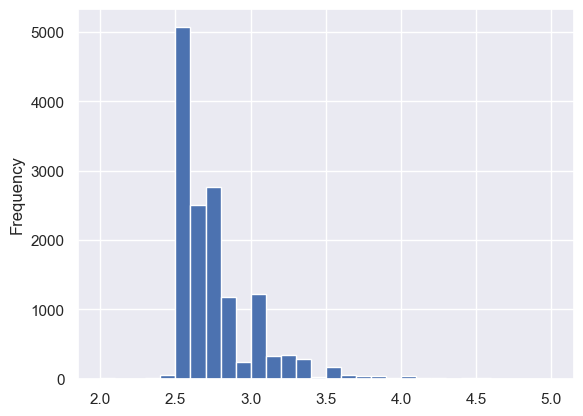

In [16]:
data['ceiling_height'].sort_values().plot(y = 'ceiling_height', kind = 'hist', bins = 30, range=(2,5))
print ('Медиана высоты потолков :', data['ceiling_height'].median())

  - ***Заменяем по всему фрейму высоту потолка на медиану***

In [17]:
# Удаляем записи, где отсутствует локация и этажность эти данные не учасвуют в анализе
data.dropna(subset=['locality_name'], inplace=True)
data.dropna(subset=['floors_total'], inplace=True)
# Заменяем оставшиеся пустые значения высоты потолков на медианное значение по всему датасету
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby(['locality_name', 'floors_total'])['ceiling_height'].transform('median'))
# Заменяем пустые значения жилой площади и площади кухни ииспользуя коэффициент приведения от общей площади 
# к жилой
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height            372
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

- ***Предобработка данных проведена***

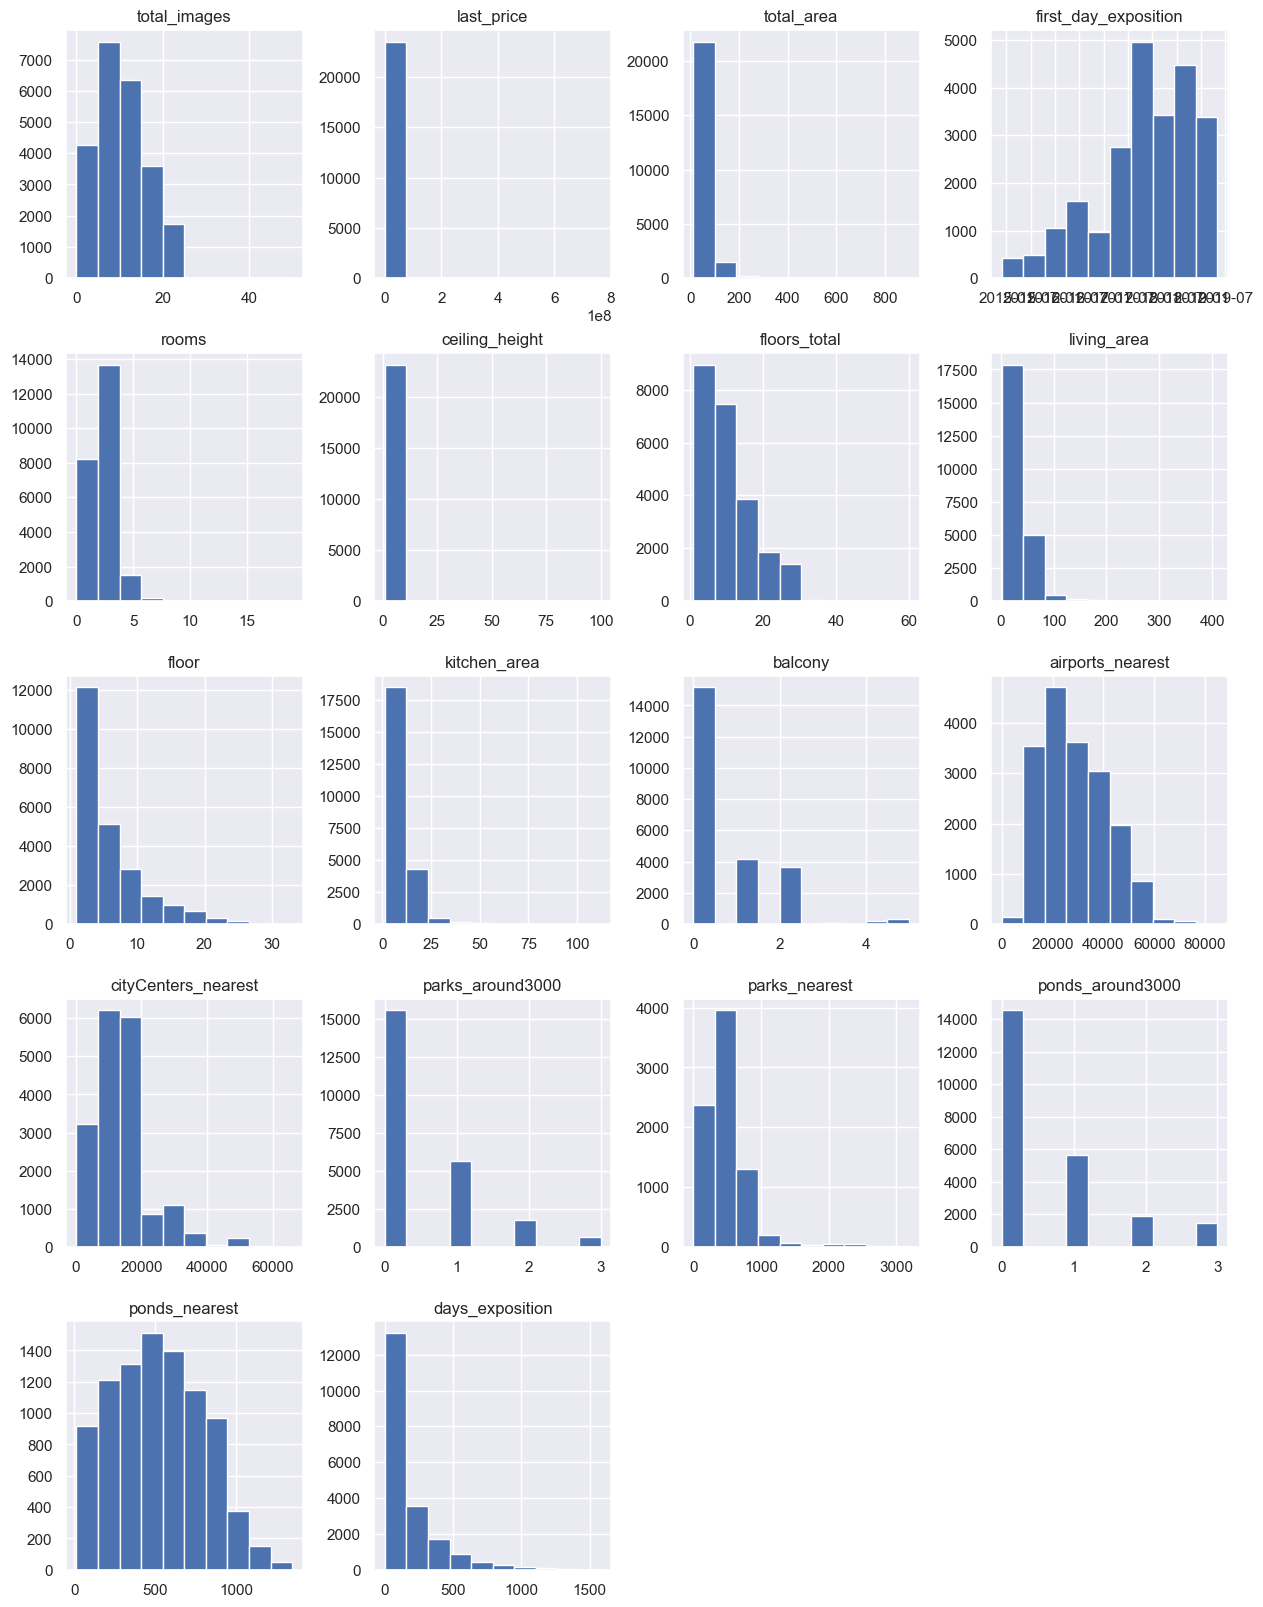

In [19]:
data.hist(figsize=(15,20)); # построение гистограммы для всех столбцов таблицы

In [20]:
data['total_area'].describe()

count   23,565.00
mean        60.32
std         35.66
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

### Обработка редких и выбиваюшихся значений

In [21]:
data['kitchen_area'].describe()

count   23,565.00
mean        10.50
std          6.04
min          1.30
25%          7.00
50%          9.00
75%         12.00
max        112.00
Name: kitchen_area, dtype: float64

In [22]:
data = data.query('kitchen_area > 1.3 and kitchen_area < 50')
data['kitchen_area'].describe()

count   23,492.00
mean        10.34
std          5.22
min          2.00
25%          7.00
50%          9.00
75%         12.00
max         49.40
Name: kitchen_area, dtype: float64

In [23]:
data['total_area'].describe()

count   23,492.00
mean        59.70
std         32.77
min         12.00
25%         40.00
50%         52.00
75%         69.20
max        631.20
Name: total_area, dtype: float64

In [24]:
data = data.query('total_area < 200')
data['total_area'].describe()

count   23,300.00
mean        58.01
std         26.27
min         12.00
25%         40.00
50%         51.60
75%         68.50
max        199.20
Name: total_area, dtype: float64

In [25]:
data['living_area'].describe()

count   23,300.00
mean        33.26
std         17.24
min          2.00
25%         19.00
50%         30.00
75%         42.00
max        164.70
Name: living_area, dtype: float64

In [26]:
data = data.query('living_area < 100')
data['living_area'].describe()

count   23,110.00
mean        32.59
std         15.63
min          2.00
25%         18.90
50%         30.00
75%         41.60
max         99.96
Name: living_area, dtype: float64

In [27]:
data['last_price'].describe()

count        23,110.00
mean      5,834,264.86
std       5,687,498.00
min          12,190.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,590,000.00
max     330,000,000.00
Name: last_price, dtype: float64

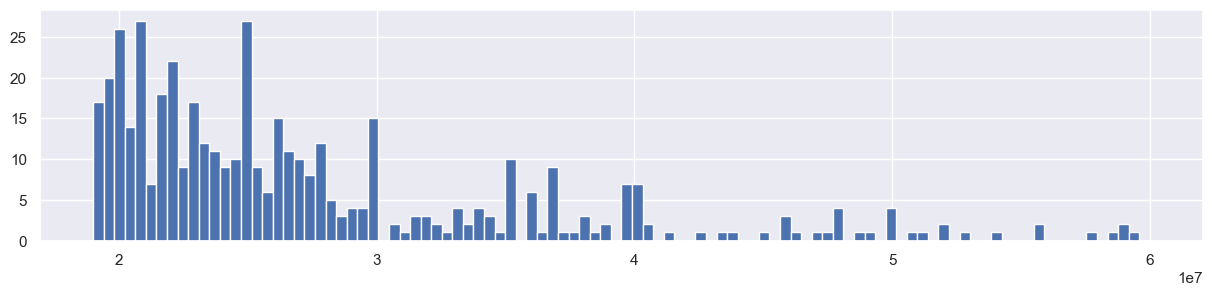

In [28]:
data.last_price.hist(bins = 100, figsize = (15,3), range = (19000000,60000000));

In [29]:
data = data.query('last_price >= 200000 and last_price < 250000000')
data['last_price'].describe()

count        23,107.00
mean      5,808,223.07
std       4,932,113.23
min         430,000.00
25%       3,400,000.00
50%       4,600,000.00
75%       6,590,000.00
max     124,000,000.00
Name: last_price, dtype: float64

In [30]:
data['rooms'].describe()

count   23,107.00
mean         2.01
std          0.96
min          0.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64

In [31]:
data = data.query('rooms >= 1 and rooms < 10')
data['rooms'].describe()

count   22,914.00
mean         2.03
std          0.94
min          1.00
25%          1.00
50%          2.00
75%          3.00
max          7.00
Name: rooms, dtype: float64

In [32]:
data['days_exposition'].describe()

count   19,874.00
mean       179.13
std        217.91
min          1.00
25%         45.00
50%         95.00
75%        228.75
max      1,580.00
Name: days_exposition, dtype: float64

In [33]:
data['days_exposition'].describe()

count   19,874.00
mean       179.13
std        217.91
min          1.00
25%         45.00
50%         95.00
75%        228.75
max      1,580.00
Name: days_exposition, dtype: float64

In [34]:
data[data.days_exposition > 1000]['days_exposition'].count()

260

In [35]:
data = data[(data.days_exposition <= 1000) | (data.days_exposition.isna())]

In [36]:
data['days_exposition'].describe()

count   19,614.00
mean       166.01
std        186.37
min          1.00
25%         44.00
50%         92.00
75%        219.00
max      1,000.00
Name: days_exposition, dtype: float64

In [37]:
data[data.days_exposition <= 10]['days_exposition'].count()

1223

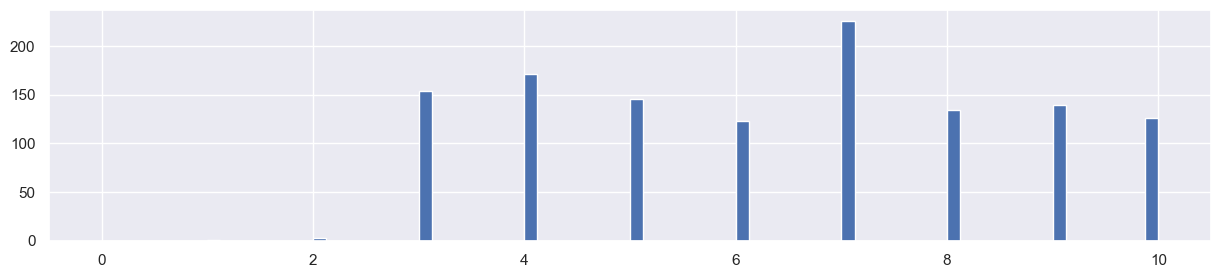

In [38]:
data.days_exposition.hist(bins = 80, figsize = (15,3), range = (0,10));

In [39]:
data = data[(data.days_exposition > 2) | (data.days_exposition.isna())]

In [40]:
data['days_exposition'].describe()

count   19,610.00
mean       166.04
std        186.37
min          3.00
25%         44.00
50%         92.00
75%        219.00
max      1,000.00
Name: days_exposition, dtype: float64

- ***Удалили аномалии и редкости в колонках:
    'total_area', 'last_price', 'living_area',  'kitchen_area', 'days_exposition'***

### Посчитаем и добавимв в таблицу новые столбцы

In [41]:
# Добавляем столбец со стоимостью квадратного метра (sm_price) и приводим его в целочисленный тип
data['sm_price'] = data['last_price'] / data['total_area']
data['sm_price'] = data['sm_price'].astype(int)
# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

#добавляем столбец асстояние до центра в м
data['cityCenters_nearest_km'] = round(data['cityCenters_nearest'] / 1000)

In [42]:
# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    elif (row['floor'] == 0 & row['floor'] < 0):
        return 'другой'
    else:
        return 'другой'
    
data['floor_type'] = data.apply(floor_group, axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22650 entries, 0 to 23612
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            22650 non-null  int64         
 1   last_price              22650 non-null  int32         
 2   total_area              22650 non-null  float64       
 3   first_day_exposition    22650 non-null  datetime64[ns]
 4   rooms                   22650 non-null  int64         
 5   ceiling_height          22284 non-null  float64       
 6   floors_total            22650 non-null  int32         
 7   living_area             22650 non-null  float64       
 8   floor                   22650 non-null  int64         
 9   is_apartment            22650 non-null  bool          
 10  studio                  22650 non-null  bool          
 11  open_plan               22650 non-null  bool          
 12  kitchen_area            22650 non-null  float6

In [44]:
data['total_area'].describe()

count   22,650.00
mean        57.19
std         24.13
min         12.00
25%         40.00
50%         51.37
75%         68.00
max        198.00
Name: total_area, dtype: float64

#### Построим информационные диаграммы

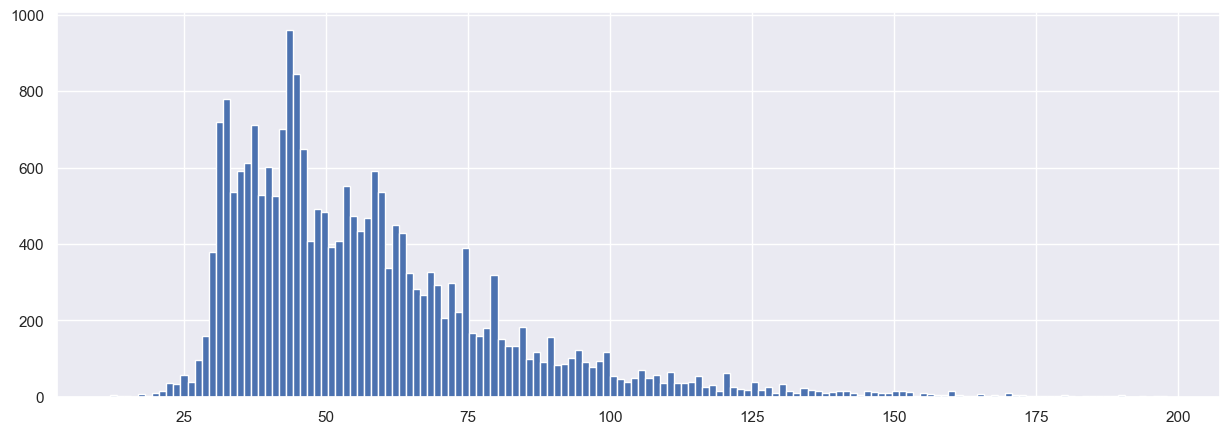

In [45]:
data.total_area.hist(bins = 150, figsize = (15,5));

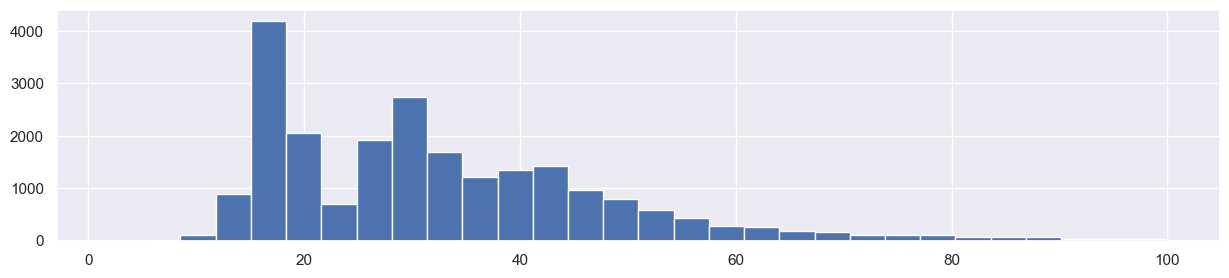

In [46]:
data.living_area.hist(bins = 30, figsize = (15,3));

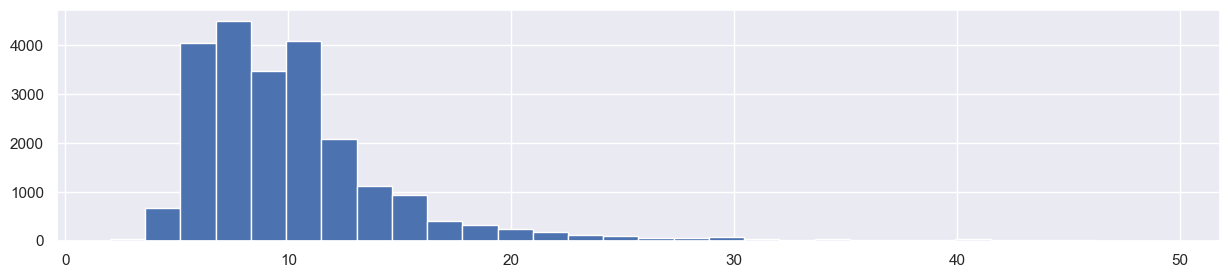

In [47]:
 data.kitchen_area.hist(bins = 30, figsize = (15,3));

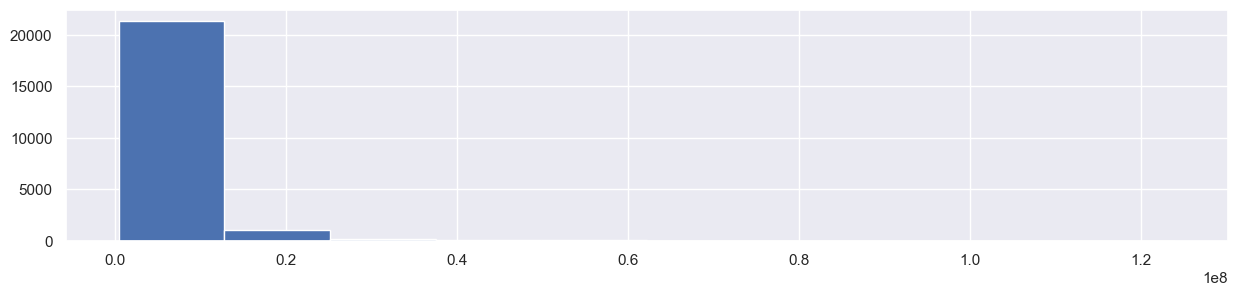

In [48]:
data.last_price.hist(bins = 10, figsize = (15,3));

In [49]:
#сводная таблица
data_pivot = data.pivot_table(index = ['total_area', 'rooms','kitchen_area'], values='last_price',aggfunc=('mean','count'))

display (data_pivot)
data['total_area'].describe()

,,,count,mean
total_area,rooms,kitchen_area,,
12.00,1,2.10,1,"2,400,000.00"
13.00,1,2.28,3,"2,350,000.00"
13.20,1,2.31,1,"1,686,000.00"
14.00,1,2.00,1,"1,190,000.00"
15.00,1,2.63,2,"1,725,000.00"
...,...,...,...,...
190.00,5,25.86,1,"86,738,800.00"
193.20,4,17.60,1,"22,990,000.00"
196.00,4,31.00,1,"19,900,000.00"


count   22,650.00
mean        57.19
std         24.13
min         12.00
25%         40.00
50%         51.37
75%         68.00
max        198.00
Name: total_area, dtype: float64

In [68]:
data_pivot = data.pivot_table(index = ['total_area', 'rooms','kitchen_area'], values='last_price',aggfunc=('mean','count'))

display (data_pivot)
data['total_area'].describe()
data['kitchen_area'].describe()
data['living_area'].describe()

data_good  = data

,,,count,mean
total_area,rooms,kitchen_area,,
12.00,1,2.10,1,"2,400,000.00"
13.00,1,2.28,3,"2,350,000.00"
13.20,1,2.31,1,"1,686,000.00"
14.00,1,2.00,1,"1,190,000.00"
15.00,1,2.63,2,"1,725,000.00"
...,...,...,...,...
190.00,5,25.86,1,"86,738,800.00"
193.20,4,17.60,1,"22,990,000.00"
196.00,4,31.00,1,"19,900,000.00"


### Проводим исследовательский анализ данных

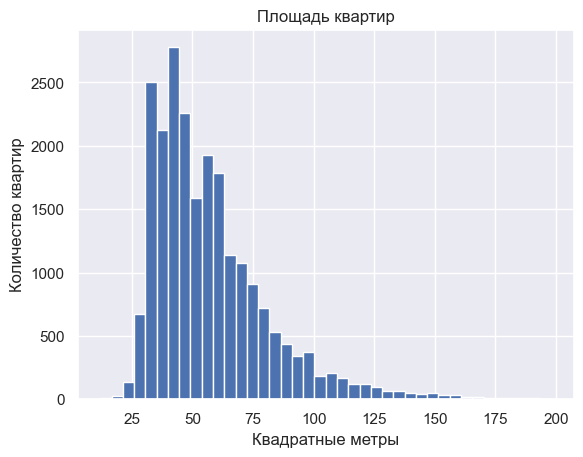

Средняя:  57.19195408388504
Медиана:  51.370000000000005
Максимальная:  198.0
Минимальная:  12.0


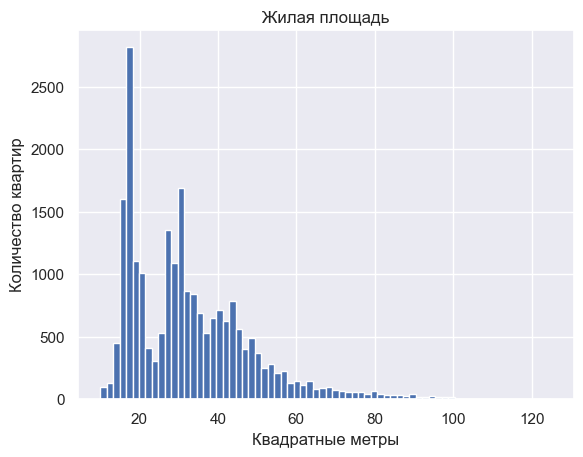

Средняя:  32.6254407303242
Медиана:  30.0
Максимальная:  99.95542967561289
Минимальная:  2.0


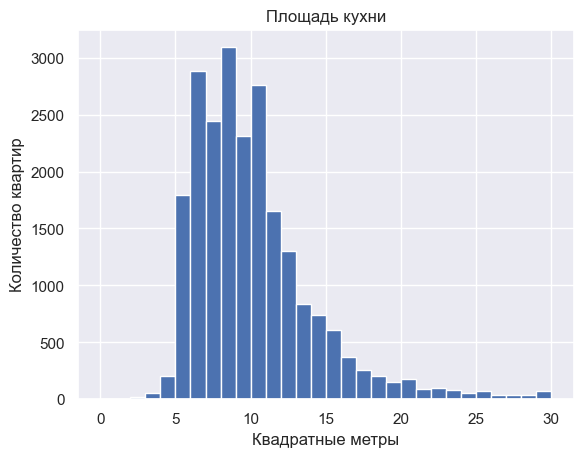

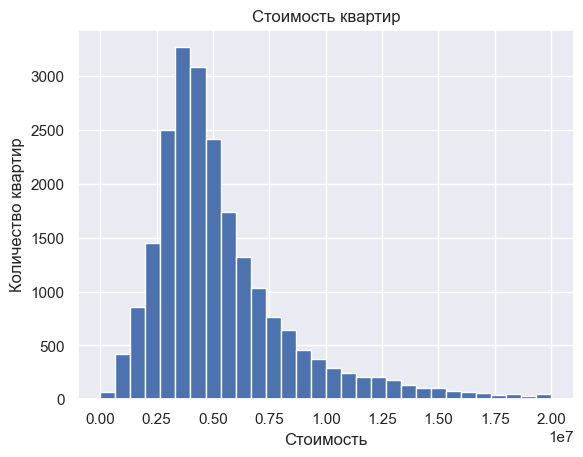

Средняя:  5805862.770066225
Медиана:  4600000.0
Максимальная:  124000000
Минимальная:  430000


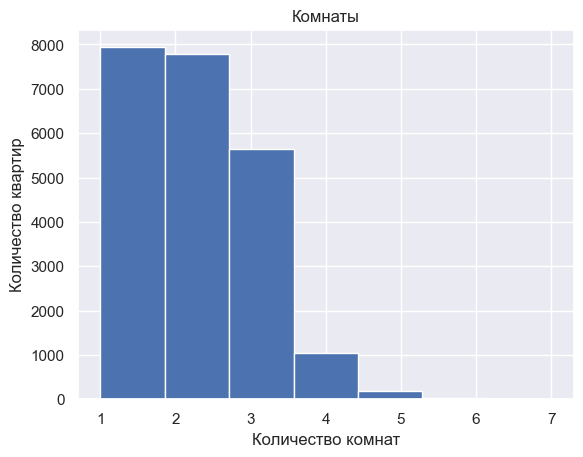

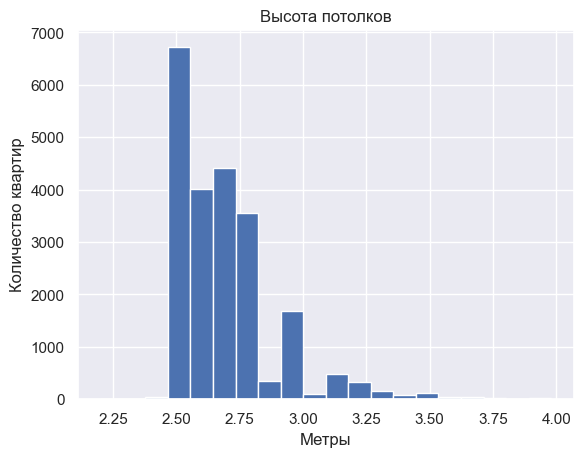

Средняя:  2.7290715311433345
Медиана:  2.65
Максимальная:  100.0
Минимальная:  1.0


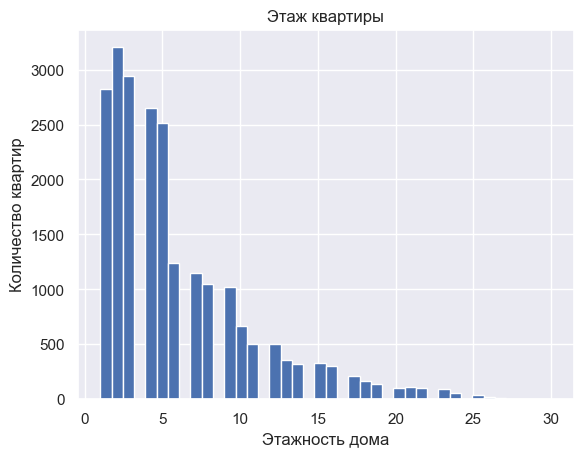

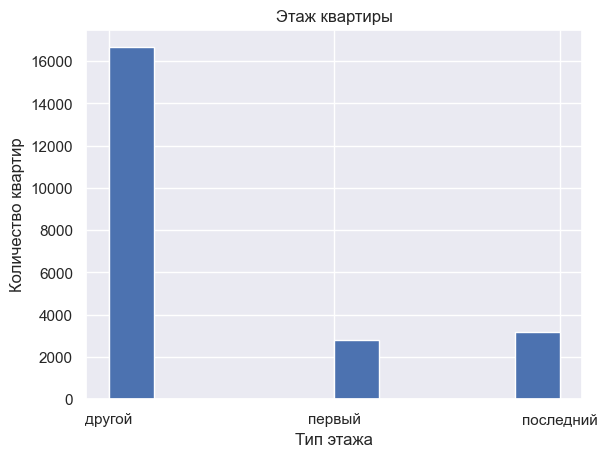

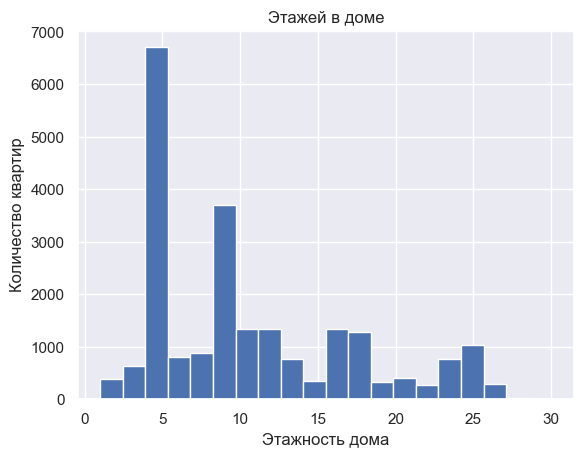

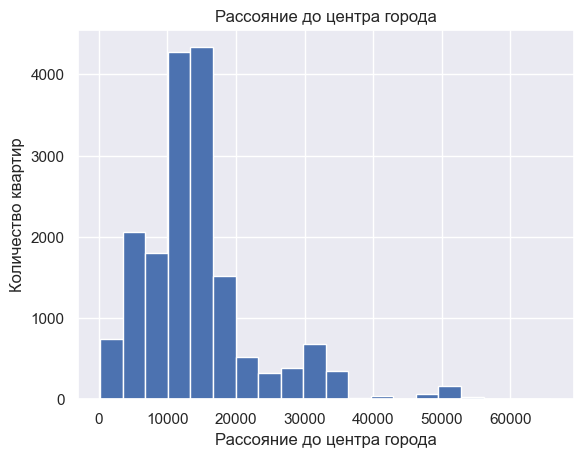

Среднее растояние до центра:  14406.839592616168


In [69]:
#Распределение количества квартир в зависимости от общей площади

#plt.hist(data['total_area'], bins=40, range=(10,200))
plt.hist(data['total_area'], bins=40)
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')

plt.show()

print ('Средняя: ', data['total_area'].mean())
print ('Медиана: ', data['total_area'].median())
print ('Максимальная: ', data['total_area'].max())
print ('Минимальная: ', data['total_area'].min())


#Распределение количества квартир в зависимости от жилой площади
plt.hist(data['living_area'], bins=70, range=(10,125))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print ('Средняя: ', data['living_area'].mean())
print ('Медиана: ', data['living_area'].median())
print ('Максимальная: ', data['living_area'].max())
print ('Минимальная: ', data['living_area'].min())

#распределение количества квартир в зависимости от площади кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

# зависимость распределение квартир по стоимости
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print ('Средняя: ', data['last_price'].mean())
print ('Медиана: ', data['last_price'].median())
print ('Максимальная: ', data['last_price'].max())
print ('Минимальная: ', data['last_price'].min())

# зависимсоть от количества комнат
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

# зависимость от высоты потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
print ('Средняя: ', data['ceiling_height'].mean())
print ('Медиана: ', data['ceiling_height'].median())
print ('Максимальная: ', data['ceiling_height'].max())
print ('Минимальная: ', data['ceiling_height'].min())

#этаж квартиры
#df[‘column’].plot(kind=‘hist’, title= ‘название’
#data['floor'].plot(kind='hist', title = 'Этаж квартиры')
plt.hist(data['floor'], bins=40, range=(1,30))
plt.title('Этаж квартиры')
plt.xlabel('Этажность дома')
plt.ylabel('Количество квартир')
plt.show()

# тип этажа квартиры
#plt.hist(data['floor_type'], bins=10, range=(1,30))
#data.info()
plt.hist(data['floor_type'], bins=10)
plt.title('Этаж квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')

plt.show()

#data.plot(y='floor_type',kind='pie',figsize=(8,8))

#data['floor_type'].value_counts().plot.bar()

#количество этажей в доме
plt.hist(data['floors_total'], bins=20, range=(1,30))
plt.title('Этажей в доме')
plt.xlabel('Этажность дома')
plt.ylabel('Количество квартир')
plt.show()

#data.plot(y='floors_total',kind='pie',figsize=(8,8))

# расстояние от цента городо в метрах

plt.hist(data['cityCenters_nearest'], bins=20)
plt.title('Рассояние до центра города')
plt.xlabel('Рассояние до центра города')
plt.ylabel('Количество квартир')
plt.show()
print ('Среднее растояние до центра: ', data['cityCenters_nearest'].mean())


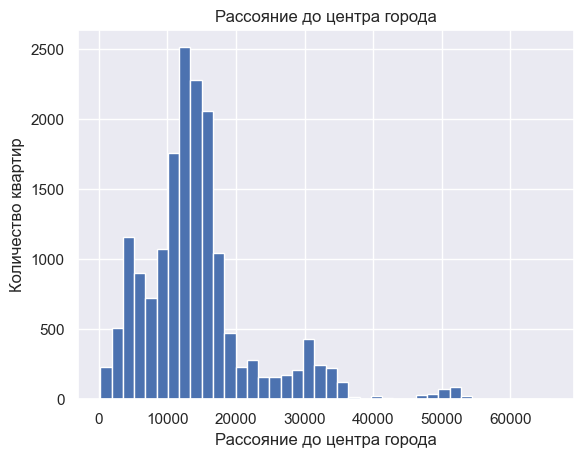

Среднее растояние до центра:  14406.839592616168


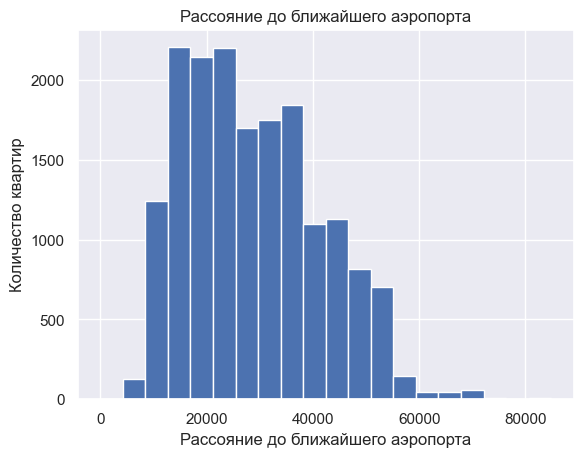

Среднее растояние до аэропорта:  28901.222582700888


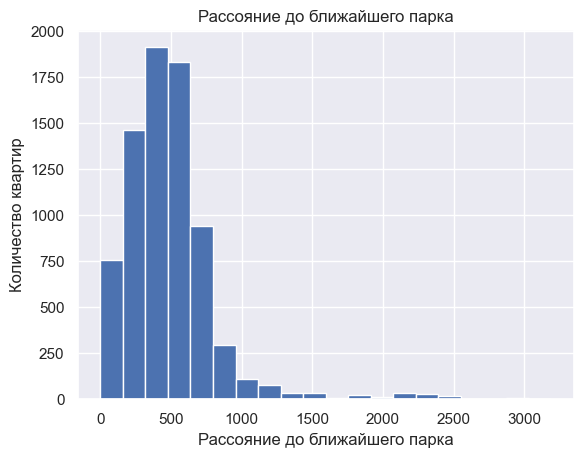

Среднее растояние до парка:  491.8896942540854


In [52]:
# расстояние от центра городо в метрах

plt.hist(data['cityCenters_nearest'], bins=40)
plt.title('Рассояние до центра города')
plt.xlabel('Рассояние до центра города')
plt.ylabel('Количество квартир')
plt.show()
print ('Среднее растояние до центра: ', data['cityCenters_nearest'].mean())

# расстояние доближайшего аэрпорта в метрах

plt.hist(data['airports_nearest'], bins=20)
plt.title('Рассояние до ближайшего аэропорта')
plt.xlabel('Рассояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.show()
print ('Среднее растояние до аэропорта: ', data['airports_nearest'].mean())

# расстояние доближайшего парка в метрах

plt.hist(data['parks_nearest'], bins=20)
plt.title('Рассояние до ближайшего парка')
plt.xlabel('Рассояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()
print ('Среднее растояние до парка: ', data['parks_nearest'].mean())


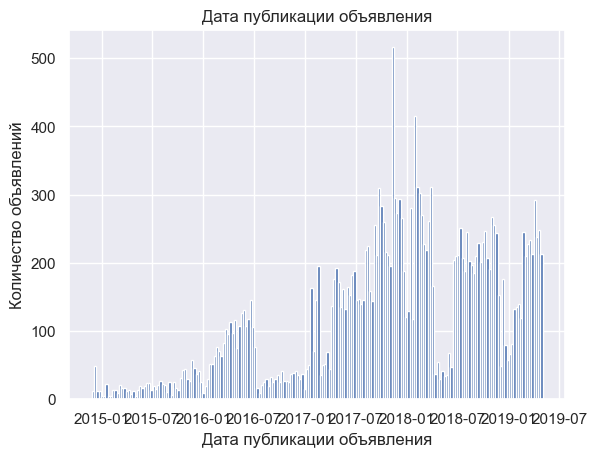

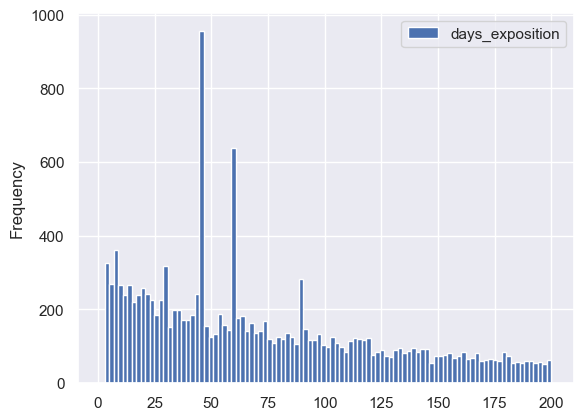

In [53]:
# Дата размещения объявления
plt.hist(data['first_day_exposition'], bins=200)
plt.title('Дата публикации объявления')
plt.xlabel('Дата публикации объявления')
plt.ylabel('Количество объявлений')
plt.show()

data.plot(y = 'days_exposition', kind = 'hist', bins = 100, grid = True, range = (1,200));

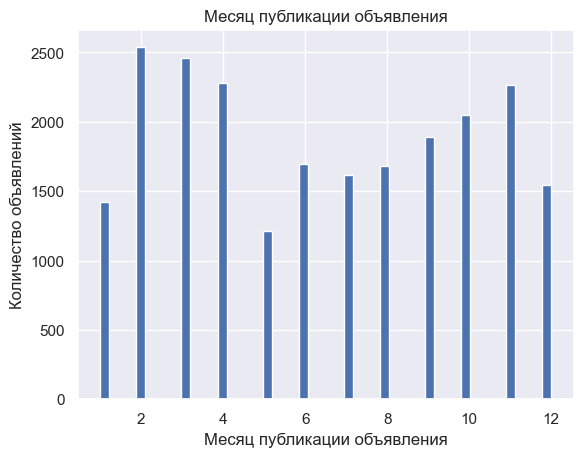

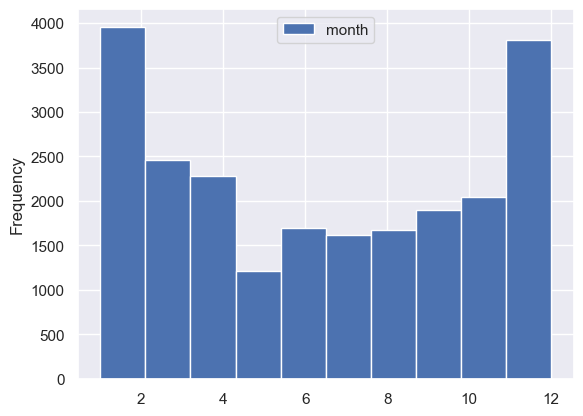

In [54]:
# Месяц размещения объявления
plt.hist(data['month'], bins=50)
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество объявлений')
plt.show();

data.plot(y = 'month', kind = 'hist', bins = 10, grid = True, range = (1,12));

- ***По месяцам рспределение выглядит так. В Январе, Мае  и Декабре меньше всего. В Феврале, Марте и Ноябре максимумы. В остальной период года все примерно одинаково.***

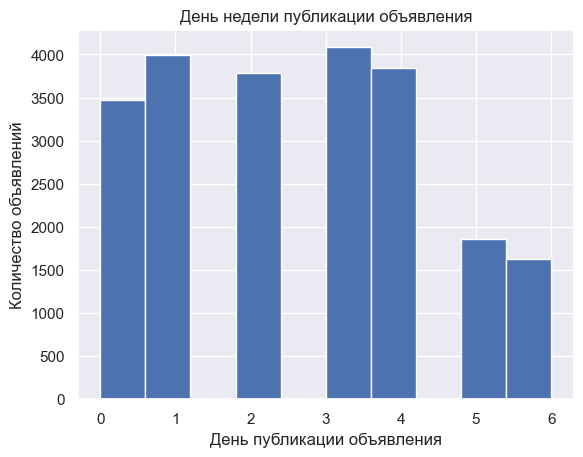

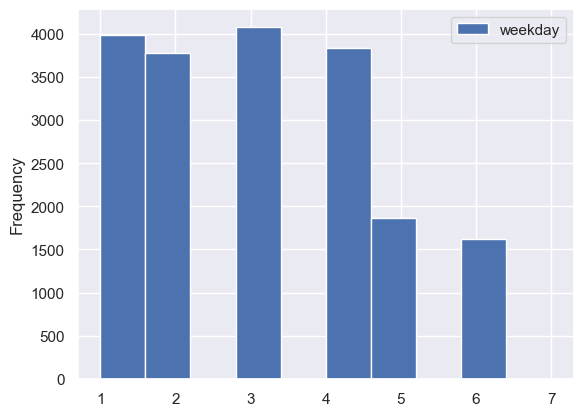

In [55]:
#weekday
# Месяц размещения объявления
plt.hist(data['weekday'], bins=10)
plt.title('День недели публикации объявления')
plt.xlabel('День публикации объявления')
plt.ylabel('Количество объявлений')
plt.show();

data.plot(y = 'weekday', kind = 'hist', bins = 10, grid = True, range = (1,7));


- ***По дням недели распределение выглядит равномерно в Пн,Вт,Ср, Чт и снижается в выходные дни.***

In [56]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='sm_price', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('sm_price', ascending=False)


,sm_price
locality_name,
Санкт-Петербург,112544
Пушкин,102884
Кудрово,95073
посёлок Парголово,90374
посёлок Мурино,85613
посёлок Шушары,78211
Колпино,75279
Гатчина,68797
Всеволожск,68663


- ***Наибольшая средняя стоимость квадратного метра в Санкт-Петербурге, затем идёт Пушкин, далее идут районы фактически являющиеся пригородом Санкт-Петербурга это Кудрово, Парголово, Мурино и т.д. Из топ-10 наименьшая стоимость в Гатчине и Всеволожске.***

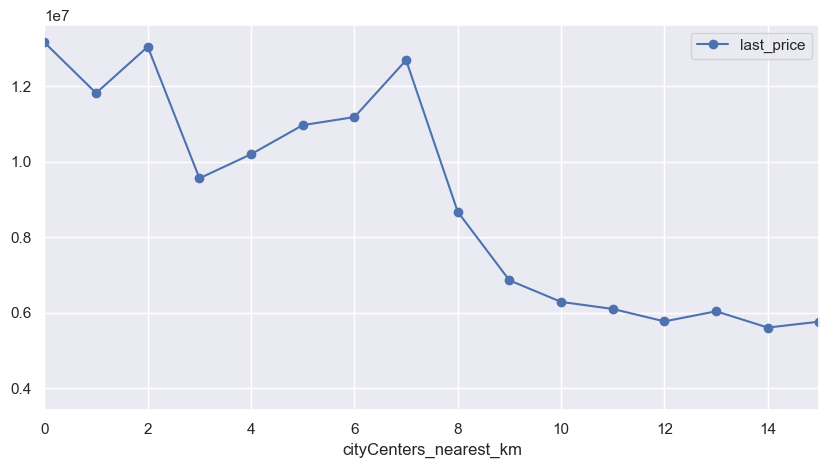

In [57]:
# Столбец с расстоянием до центра в км, округляем до целого
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].fillna(value=0).astype(int)
# Выбираем Санкт-Петербург, смотрим на график, где указана средняя стоимость для каждого км
(
    data.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,15), figsize=(10, 5))
)
plt.show();



- ***В центральной зоне наблюдается резкое снижение цены в зоне до 2,5 км. от центра, далее цена растет и начинает резко снижаться в раойне 7 км и выходит на отностительное плато на растоянии 9 км от центра***

 - ***Рассмотрим время продажжи квартиры Среднее время продажи квартиры составляет 181 дней медиана 95 дней. Быстрым сроком продажи можно навать продажи до 50 дней, необычно долгим можно назвать сроки более 250 дней.***

Время продажи (медиана): 92.0
Время продажи (среднее): 166.0449260581336


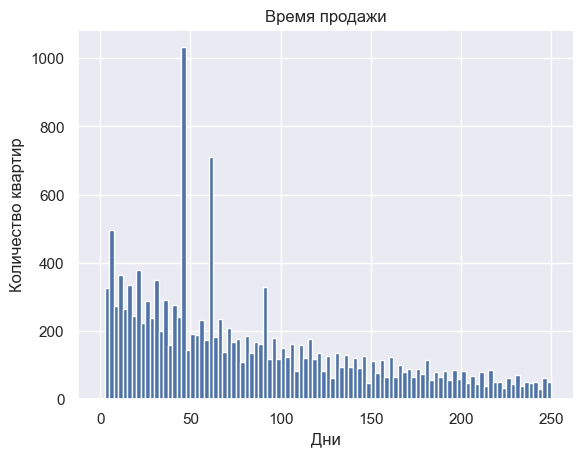

In [67]:
print('Время продажи (медиана):', data['days_exposition'].median())
print('Время продажи (среднее):', data['days_exposition'].mean())
# Гистограма времени продажи
plt.hist(data['days_exposition'], bins=100, range=(0,250));

plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show();

#### Далее идут исследования зависимости цены от параметров квартир и коэффициенты корреляциии от площади квартиры

-***Какие факторы больше всего влияют на полную стоимость квартиры***

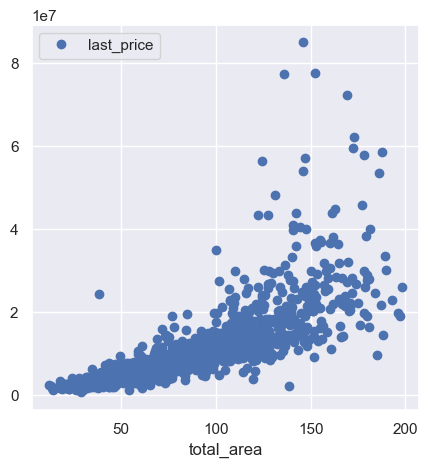

Корреляция цены и общей площади: 

0.7153507769702915


In [60]:
# Зависимость цены от общей площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общей площади:','\n')

print (data['total_area'].corr(data['last_price']))

  - ***Зависимость от общей площади, чем больше площдь тем выше цена. Строим диаграммы рассеяния***

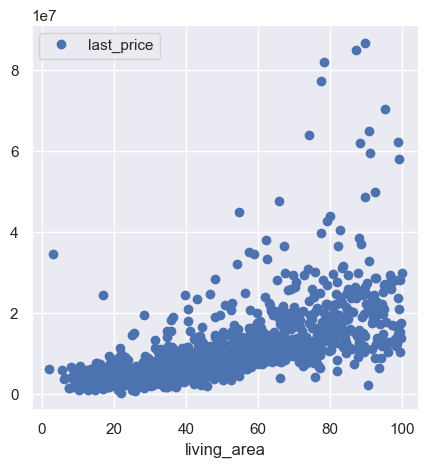

Корреляция цены и жилой площади: 

0.603775213519801


In [61]:
# Зависимость цены от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
#print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')
print (data['living_area'].corr(data['last_price']))

- ***Зависимость от жилой площади чуть ниже, чем больше площдь тем выше цена***

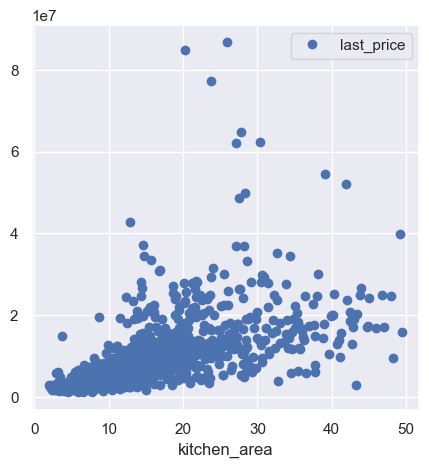

Корреляция цены от площади кухни: 

0.5568647474327708


In [62]:
# Зависимость цены от площади кухни
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены от площади кухни:','\n')
#print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')
print (data['kitchen_area'].corr(data['last_price']))

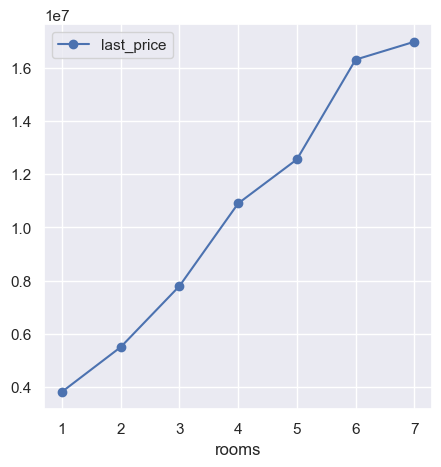

Корреляция цены и числа комнат: 

0.4097623446539481


In [63]:
# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show();
print('Корреляция цены и числа комнат:','\n')

print (data['rooms'].corr(data['last_price']))

- ***Зависимость от числа комнат незначительная ***

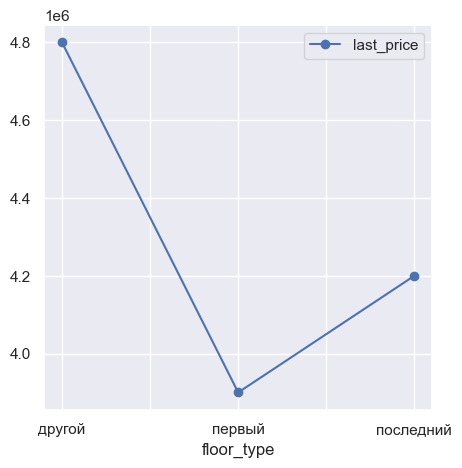

In [66]:
# Зависимость цены от этажа квартиры
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show();


 - ***Самые дешевые квартиры расположены на "первом" этаже, самые дорогие квартиры расположены на этаже "другой"***

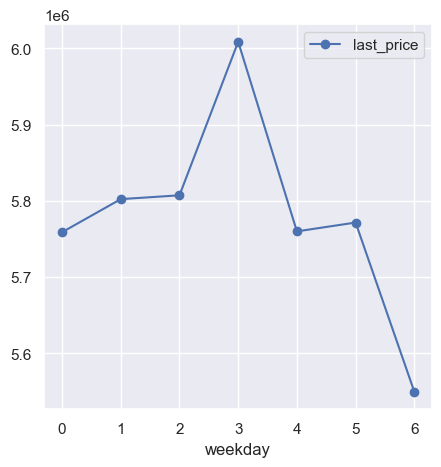

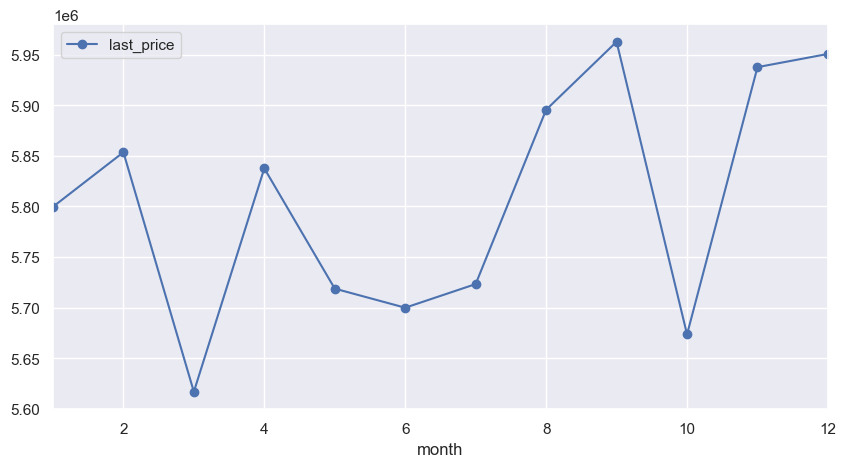

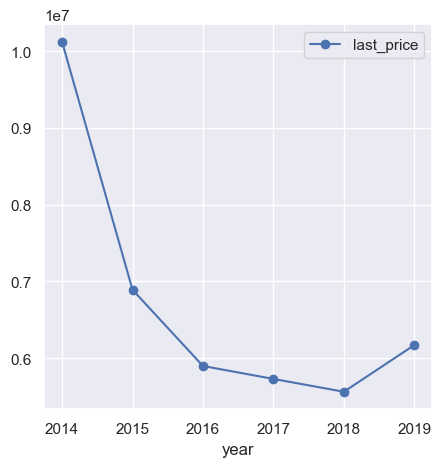

In [65]:
# Зависимость от дня размещения
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show();
# Зависимость от месяца размещения
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(10, 5))
)
plt.show();
# Зависимость от года размещения
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show();

***Зависимость от дня, месяца и года публикации объявлений о продаже****

- День недели: дороже всего квартиры, опубликованные в субботу, дешевле всего - в воскресенье.
- Месяц: дороже всего квартиры, продающиеся с апреля, дешевле всего - с июня.
- Год: квартиры очень сильно подешевели в 2015-2018 годах. В 2019 году цены снова стали повышаться.

# Общий вывод по проекту

***Срок продажи квартиры***

Чаще всего квартиру продают за 95 дней. Если меньше 45 дней, то это быстро, если дольше 230 дней - это долго.
Есть большое число квартир, проданных всего за несколько дней после публикации. Также есть варианты, которые продавались несколько десятков месяцев.

***Факторы, влияющие на стоимость квартиры***

На стоимость больше влияет площадь квартиры, нежели число комнат. Т.е. могут быть дорогие квартиры с малым числом комнат, но где комнаты просторные.
Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого.

***Стоимость квадратного метра в топ-10 населённых пунктов***

Дороже всего квадратный метр в Санкт-Петербурге - 114848
Дешевле всего квадратный метр в Выборге - 58141

***Факторы, влияющие на стоимость в центре Санкт-Петербурга***

В центральной зоне наблюдается резкое снижение цены в зоне до 2,5 км. от центра, далее цена растет и начинает резко снижаться в раойне 7 км и выходит на отностительное плато на растоянии 9 км от центра.таким образом можно сказать что в центре города практически нет разницы, насколько квартира удалена от условного центра города.